# Support Vector Machines


In [1]:
# globals
CV_FOLDS = 10
N_JOBS = 1

In [2]:
# import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.decomposition import PCA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.pipeline import Pipeline
import sklearn 
print (sklearn.__version__)

import warnings
warnings.simplefilter(action='once', category=FutureWarning)

0.20.1


In [3]:
# import data
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        
X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

In [4]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,75,65,60,47,31,18,12,7,3,1,...,10751.25,10827.5,10827.50,10924.25,10880.75,10848.50,10473.0,9785.0,9555.50,6308.0
u01,44,39,36,29,23,19,12,10,5,3,...,21632.50,21658.0,21624.00,24227.00,25298.00,23310.00,20985.0,21298.0,15541.25,9186.5
u02,105,98,88,76,62,49,38,30,19,4,...,14639.50,14191.5,14451.00,14502.50,14896.00,17611.75,14191.5,14777.5,18333.00,14254.5
u04,60,54,46,41,31,23,14,8,2,0,...,22332.00,22375.5,22700.75,22718.00,23324.00,23942.00,24879.0,25229.0,26646.00,0.0
u08,107,102,92,79,62,50,38,28,17,6,...,10007.50,10044.5,9948.00,9989.00,9918.00,9761.00,9903.0,9933.0,9989.00,8869.5


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u03,47,41,37,30,21,10,6,1,0,0,...,24734.50,28016.00,28016.00,24631.00,25801.00,17806.00,16529.50,17806.0,5735.0,0.00
u27,73,67,52,47,38,31,19,18,12,8,...,13938.00,14609.75,13951.00,14491.00,14349.50,18096.25,18459.25,19254.0,19097.5,18793.25
u05,72,68,61,48,38,29,18,14,10,4,...,18138.25,18786.25,19550.75,20192.00,25011.50,22830.50,17359.75,17141.5,17448.5,16834.25
u43,69,69,57,49,44,35,25,21,14,7,...,16965.25,16965.25,17061.00,17221.25,17900.75,21970.00,24245.25,22225.0,18883.0,9766.50
u56,39,32,21,18,15,13,9,9,6,3,...,20992.00,21379.75,22694.75,23458.00,23239.25,25084.25,24099.00,24099.0,26136.0,24657.50


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u00,32.0,NaN,NaN,32.0,33.0,49.0,1.0,NaN,NaN,1.0,...,45.0,31.0,24.0,45.0,1.0,1.0,1.0,1.0,1.0,1.0
u01,30.0,19.0,45.0,30.0,19.0,45.0,1.0,1.0,1.0,1.0,...,46.0,27.0,17.0,46.0,0.0,0.0,1.0,0.0,0.0,1.0
u02,23.0,15.0,46.0,23.0,15.0,46.0,0.0,0.0,1.0,0.0,...,44.0,28.0,13.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
u04,27.0,14.0,27.0,27.0,14.0,27.0,0.0,0.0,0.0,0.0,...,33.0,34.0,19.0,33.0,1.0,1.0,0.0,1.0,1.0,0.0
u08,30.0,26.0,NaN,30.0,26.0,38.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u03,30.0,27.0,34.0,30.0,27.0,34.0,1.0,1.0,0.0,1.0,...,31.0,25.0,20.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u27,23.0,18.0,31.0,23.0,18.0,31.0,0.0,0.0,0.0,0.0,...,31.0,19.0,23.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u05,32.0,27.0,48.0,32.0,27.0,48.0,1.0,1.0,1.0,1.0,...,50.0,33.0,17.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0
u43,31.0,18.0,47.0,31.0,18.0,47.0,1.0,0.0,1.0,1.0,...,42.0,32.0,21.0,42.0,1.0,1.0,0.0,1.0,1.0,0.0
u56,22.0,9.0,46.0,22.0,9.0,46.0,0.0,0.0,1.0,0.0,...,48.0,29.0,15.0,48.0,1.0,0.0,1.0,1.0,0.0,1.0


# EDA

In [5]:
y_train.describe()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
count,36.000000,34.000000,33.000000,37.000000,37.000000,37.000000,36.000000,34.000000,33.000000,37.000000,...,28.000000,30.000000,30.000000,28.000000,29.000000,30.000000,28.000000,30.000000,30.000000,28.000000
mean,28.500000,19.382353,42.636364,28.513514,19.810811,42.972973,0.527778,0.441176,0.545455,0.540541,...,43.178571,29.600000,21.766667,43.178571,0.517241,0.566667,0.500000,0.533333,0.566667,0.500000
std,6.235841,7.781153,9.266263,6.149172,7.978575,9.114965,0.506309,0.503995,0.505650,0.505228,...,9.412575,6.881259,8.067317,9.412575,0.508548,0.504007,0.509175,0.507416,0.504007,0.509175
min,13.000000,10.000000,15.000000,13.000000,10.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,17.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,14.000000,41.000000,26.000000,14.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.500000,25.250000,15.000000,40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,17.500000,45.000000,29.000000,18.000000,45.000000,1.000000,0.000000,1.000000,1.000000,...,44.500000,31.000000,20.000000,44.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000
75%,32.250000,21.750000,49.000000,32.000000,25.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,48.250000,34.000000,27.500000,48.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,43.000000,54.000000,42.000000,43.000000,56.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,43.000000,37.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
y_train.columns

Index(['panas_pos_raw_pre', 'panas_neg_raw_pre', 'flourishing_scale_raw_pre',
       'panas_pos_imp_pre', 'panas_neg_imp_pre', 'flourishing_scale_imp_pre',
       'panas_pos_raw_class_pre', 'panas_neg_raw_class_pre',
       'flourishing_scale_raw_class_pre', 'panas_pos_imp_class_pre',
       'panas_neg_imp_class_pre', 'flourishing_scale_imp_class_pre',
       'panas_pos_raw_post', 'panas_neg_raw_post',
       'flourishing_scale_raw_post', 'panas_pos_imp_post',
       'panas_neg_imp_post', 'flourishing_scale_imp_post',
       'panas_pos_raw_class_post', 'panas_neg_raw_class_post',
       'flourishing_scale_raw_class_post', 'panas_pos_imp_class_post',
       'panas_neg_imp_class_post', 'flourishing_scale_imp_class_post'],
      dtype='object')

In [7]:
y_train.loc[:, ['flourishing_scale_imp_class_pre']].hist()
y_train.loc[:, ['flourishing_scale_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2491B9E8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B2407E908>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B24F4BE80>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B24F4BE48>]],
      dtype=object)

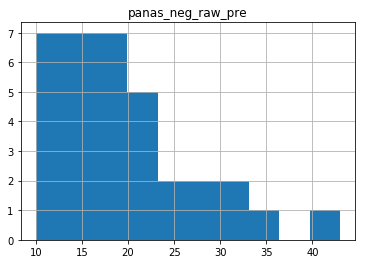

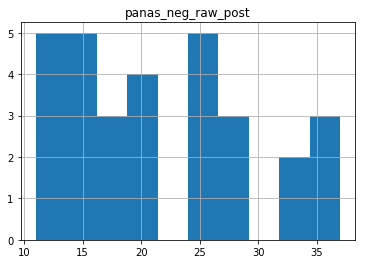

In [8]:
y_train.loc[:, ['panas_neg_raw_pre']].hist()
y_train.loc[:, ['panas_neg_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B250054E0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B24FFC9E8>]],
      dtype=object)

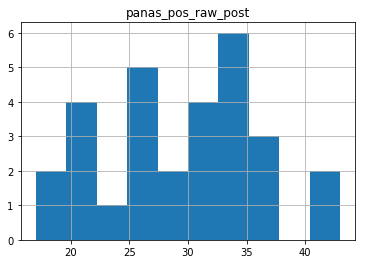

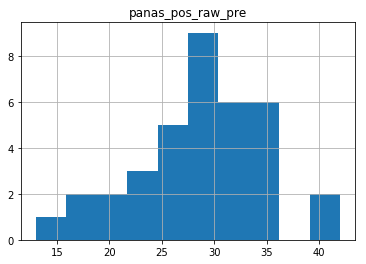

In [9]:
y_train.loc[:, ['panas_pos_raw_post']].hist()
y_train.loc[:, ['panas_pos_raw_pre']].hist()

# Pre-processing

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy="most_frequent")
scaler = StandardScaler()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_train.head()
X_train.describe()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,0.149578,0.005453,0.097421,-0.065757,-0.398165,-0.670268,-0.717292,-0.725266,-0.786524,-0.783586,...,-1.129280,-1.019613,-1.069367,-1.066339,-1.047293,-0.693251,-0.761880,-0.810904,-0.687946,-0.615569
u01,-0.764098,-0.804640,-0.722965,-0.762011,-0.762201,-0.615215,-0.717292,-0.506042,-0.580223,-0.315773,...,1.466773,1.398415,1.496193,2.045637,1.952432,1.219253,1.007194,1.054999,0.231072,-0.236953
u02,1.033780,1.033647,1.054538,1.055984,1.012476,1.036369,0.922232,0.955451,0.863887,-0.081867,...,-0.201620,-0.268563,-0.208319,-0.229262,-0.211860,0.344725,-0.136091,-0.001774,0.659701,0.429653
u04,-0.292524,-0.337279,-0.381138,-0.297842,-0.398165,-0.395004,-0.591175,-0.652191,-0.889675,-1.017492,...,1.633660,1.558605,1.752060,1.692629,1.541712,1.316248,1.662519,1.692093,1.936031,-1.445274
u08,1.092727,1.158277,1.191269,1.172026,1.012476,1.091422,0.922232,0.809302,0.657586,0.385945,...,-1.306724,-1.194427,-1.278361,-1.285127,-1.247607,-0.860153,-0.857806,-0.786918,-0.621388,-0.278649


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,7.771561e-17,-9.992007e-17,5.551115e-17,-1.554312e-16,0.000000,0.000000,-2.220446e-17,-5.551115e-17,-5.551115e-18,7.771561e-17,...,1.547373e-16,-5.342948e-17,-6.938894e-19,7.979728e-17,1.304512e-16,8.118506e-17,-6.713380e-17,-5.273559e-17,-1.304512e-16,-7.771561e-17
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739,1.012739,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,...,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00
min,-2.031455e+00,-1.988622e+00,-1.953544e+00,-1.883752e+00,-1.808805,-1.661219,-1.473995e+00,-1.236788e+00,-1.095976e+00,-1.017492e+00,...,-1.524786e+00,-1.358356e+00,-1.532981e+00,-1.583160e+00,-1.522461e+00,-2.358203e+00,-2.524391e+00,-2.396752e+00,-2.155042e+00,-1.445274e+00
25%,-6.535729e-01,-6.878001e-01,-7.315107e-01,-6.556385e-01,-0.500550,-0.532636,-7.172919e-01,-7.252657e-01,-7.865241e-01,-7.835855e-01,...,-8.684519e-01,-8.900244e-01,-9.242054e-01,-8.374632e-01,-7.732449e-01,-7.465349e-01,-7.095209e-01,-7.206622e-01,-6.353505e-01,-7.354767e-01
50%,-8.620972e-02,-1.191771e-01,-1.076756e-01,-1.624591e-01,-0.193394,-0.174793,-1.497642e-01,-1.406687e-01,-6.446919e-02,-8.186715e-02,...,9.016846e-03,2.290379e-02,1.831970e-02,-1.020014e-01,-2.315217e-01,-1.367387e-01,1.830164e-04,-1.591419e-02,6.393741e-03,-8.907777e-02
75%,5.106268e-01,4.650245e-01,4.563396e-01,5.241240e-01,0.534678,0.554657,5.123513e-01,3.343164e-01,4.770720e-01,3.859451e-01,...,4.040910e-01,4.200014e-01,5.257315e-01,6.008849e-01,4.569393e-01,6.441895e-01,7.971774e-01,6.633180e-01,6.970098e-01,7.412197e-01
max,2.477977e+00,2.498046e+00,2.490213e+00,2.641895e+00,2.787152,2.632902,3.192343e+00,3.878436e+00,3.958408e+00,3.894537e+00,...,2.819702e+00,3.110213e+00,2.451104e+00,2.503447e+00,2.037323e+00,2.078088e+00,2.019085e+00,2.101642e+00,2.155124e+00,2.087847e+00


# Model Search

In [11]:
# model list classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models_clf = [RandomForestClassifier(n_estimators=100), KNeighborsClassifier(), SVC(gamma="auto", probability=True), GaussianProcessClassifier(),
          DecisionTreeClassifier(), AdaBoostClassifier(n_estimators=100), GaussianNB(),
          QuadraticDiscriminantAnalysis(), MLPClassifier(), XGBClassifier(), LogisticRegression(solver="lbfgs")]

In [12]:
# model list regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

models_reg = [RandomForestRegressor(n_estimators=100), KNeighborsRegressor(), SVR(gamma="auto"), GaussianProcessRegressor(),
          DecisionTreeRegressor(), AdaBoostRegressor(n_estimators=100), MLPRegressor(max_iter=5000), XGBRegressor(objective="reg:squarederror")]

In [13]:
def model_search(model_list, X, y, target, scoring, bigger_score_is_better=True, cv_folds=CV_FOLDS, n_jobs=N_JOBS):
    """
    searches across a grid of models
    """
    model_results = []

    target_not_null = np.logical_not(y_train.loc[:, target].isnull())

    for model in model_list:
        scores = cross_val_score(estimator=model,
                                 X=X_train[target_not_null],
                                 y=y_train[target_not_null].loc[:, target], 
                                 scoring=scoring,
                                 cv=cv_folds, 
                                 n_jobs=n_jobs)

        model_results.append([str(model.__class__), np.mean(scores), np.std(scores)])
    
    return pd.DataFrame(model_results, columns=['model_' + target, 'CV_score_' + scoring, 'std']).sort_values('CV_score_' + scoring, ascending=not bigger_score_is_better)

# Model Search - Flourishing Scale

In [14]:
%%capture
# classification
model_search_flour_class_pre = model_search(models_clf, X_train, y_train, "flourishing_scale_imp_class_pre", "neg_log_loss")
model_search_flour_class_post = model_search(models_clf, X_train, y_train, "flourishing_scale_imp_class_post", "neg_log_loss")

#regression
model_search_flour_pre = model_search(models_reg, X_train, y_train, "flourishing_scale_imp_pre", "neg_mean_squared_error")
model_search_flour_post = model_search(models_reg, X_train, y_train, "flourishing_scale_imp_post", "neg_mean_squared_error")

In [15]:
model_search_flour_class_pre
model_search_flour_class_post
model_search_flour_pre
model_search_flour_post

,model_flourishing_scale_imp_class_pre,CV_score_neg_log_loss,std
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.628159,2.388675e-01
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.693147,1.527474e-09
2,<class 'sklearn.svm.classes.SVC'>,-0.762567,1.325854e-01
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.866159,7.291748e-01
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-1.265780,1.052805e+00
8,<class 'sklearn.neural_network.multilayer_perc...,-1.413516,9.445311e-01
10,<class 'sklearn.linear_model.logistic.Logistic...,-1.511848,1.070205e+00
1,<class 'sklearn.neighbors.classification.KNeig...,-1.530590,2.494620e+00
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-11.513105,1.053619e+01
7,<class 'sklearn.discriminant_analysis.Quadrati...,-13.527847,8.639557e+00


,model_flourishing_scale_imp_class_post,CV_score_neg_log_loss,std
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.693147,0.000000
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.699826,0.134701
2,<class 'sklearn.svm.classes.SVC'>,-0.753999,0.115120
1,<class 'sklearn.neighbors.classification.KNeig...,-0.758352,0.175574
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.785351,0.431613
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.911798,0.264000
8,<class 'sklearn.neural_network.multilayer_perc...,-0.951676,0.441138
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-1.403504,1.199414
7,<class 'sklearn.discriminant_analysis.Quadrati...,-12.088712,12.923390
6,<class 'sklearn.naive_bayes.GaussianNB'>,-15.542709,8.460332


,model_flourishing_scale_imp_pre,CV_score_neg_mean_squared_error,std
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-76.636340,76.533879
2,<class 'sklearn.svm.classes.SVR'>,-80.312320,86.009898
7,<class 'xgboost.sklearn.XGBRegressor'>,-86.746973,81.522480
1,<class 'sklearn.neighbors.regression.KNeighbor...,-89.569000,86.618536
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-89.825000,70.576500
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-91.114455,80.001624
6,<class 'sklearn.neural_network.multilayer_perc...,-828.565304,447.558663
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-1956.741667,280.926714


,model_flourishing_scale_imp_post,CV_score_neg_mean_squared_error,std
1,<class 'sklearn.neighbors.regression.KNeighbor...,-82.059333,67.300368
2,<class 'sklearn.svm.classes.SVR'>,-85.824357,86.110672
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-86.755395,79.154476
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-92.730892,72.341675
7,<class 'xgboost.sklearn.XGBRegressor'>,-110.331919,110.222433
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-168.133333,91.494165
6,<class 'sklearn.neural_network.multilayer_perc...,-1081.564392,335.570946
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-1990.333333,377.412735


## Model Search - PANAs

In [16]:
%%capture
# panas regression
model_search_panas_pos_pre = model_search(models_reg, X_train, y_train, "panas_pos_imp_pre", "neg_mean_squared_error")
model_search_panas_pos_post = model_search(models_reg, X_train, y_train, "panas_pos_imp_post", "neg_mean_squared_error")
model_search_panas_neg_pre = model_search(models_reg, X_train, y_train, "panas_neg_imp_pre", "neg_mean_squared_error")
model_search_panas_neg_post = model_search(models_reg, X_train, y_train, "panas_neg_imp_post", "neg_mean_squared_error")

# panas regression
model_search_panas_pos_class_pre = model_search(models_clf, X_train, y_train, "panas_pos_imp_class_pre", "neg_mean_squared_error")
model_search_panas_pos_class_post = model_search(models_clf, X_train, y_train, "panas_pos_imp_class_post", "neg_mean_squared_error")
model_search_panas_neg_class_pre = model_search(models_clf, X_train, y_train, "panas_neg_imp_class_pre", "neg_mean_squared_error")
model_search_panas_neg_class_post = model_search(models_clf, X_train, y_train, "panas_neg_imp_class_post", "neg_mean_squared_error")

In [17]:
model_search_panas_pos_pre
model_search_panas_pos_post 
model_search_panas_neg_pre
model_search_panas_neg_post

,model_panas_pos_imp_pre,CV_score_neg_mean_squared_error,std
2,<class 'sklearn.svm.classes.SVR'>,-36.952994,32.133748
7,<class 'xgboost.sklearn.XGBRegressor'>,-40.641209,39.768334
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-44.080701,39.746806
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-46.398920,43.619752
1,<class 'sklearn.neighbors.regression.KNeighbor...,-46.878000,32.782486
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-104.150000,56.110862
6,<class 'sklearn.neural_network.multilayer_perc...,-419.344965,219.634522
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-858.466667,181.477471


,model_panas_pos_imp_post,CV_score_neg_mean_squared_error,std
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-51.723060,28.089869
7,<class 'xgboost.sklearn.XGBRegressor'>,-55.003271,25.888393
2,<class 'sklearn.svm.classes.SVR'>,-57.009868,23.905305
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-59.337074,42.227215
1,<class 'sklearn.neighbors.regression.KNeighbor...,-66.098667,32.588798
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-74.533333,55.944854
6,<class 'sklearn.neural_network.multilayer_perc...,-631.732567,278.849063
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-921.933333,232.915855


,model_panas_neg_imp_pre,CV_score_neg_mean_squared_error,std
7,<class 'xgboost.sklearn.XGBRegressor'>,-64.608786,32.356092
2,<class 'sklearn.svm.classes.SVR'>,-65.086114,46.766834
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-74.786952,42.216150
1,<class 'sklearn.neighbors.regression.KNeighbor...,-74.806333,39.545498
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-76.057832,49.137842
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-154.916667,90.414439
6,<class 'sklearn.neural_network.multilayer_perc...,-258.168971,125.104985
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-446.241667,168.569621


,model_panas_neg_imp_post,CV_score_neg_mean_squared_error,std
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-63.389683,43.075625
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-65.439787,52.188523
2,<class 'sklearn.svm.classes.SVR'>,-72.478573,47.713299
1,<class 'sklearn.neighbors.regression.KNeighbor...,-80.570667,69.230037
7,<class 'xgboost.sklearn.XGBRegressor'>,-89.407253,65.778394
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-153.066667,93.888089
6,<class 'sklearn.neural_network.multilayer_perc...,-455.388484,205.311265
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-536.700000,201.363378


In [18]:
model_search_panas_pos_class_pre
model_search_panas_pos_class_post 
model_search_panas_neg_class_pre
model_search_panas_neg_class_post

,model_panas_pos_imp_class_pre,CV_score_neg_mean_squared_error,std
2,<class 'sklearn.svm.classes.SVC'>,-0.391667,0.193828
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.416667,0.271314
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.416667,0.288675
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.433333,0.226078
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.450000,0.236291
1,<class 'sklearn.neighbors.classification.KNeig...,-0.458333,0.159208
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.483333,0.309121
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.533333,0.179505
8,<class 'sklearn.neural_network.multilayer_perc...,-0.558333,0.266276
7,<class 'sklearn.discriminant_analysis.Quadrati...,-0.566667,0.275882


,model_panas_pos_imp_class_post,CV_score_neg_mean_squared_error,std
7,<class 'sklearn.discriminant_analysis.Quadrati...,-0.400000,0.240947
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.425000,0.237024
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.433333,0.270801
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.441667,0.361421
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.475000,0.333437
8,<class 'sklearn.neural_network.multilayer_perc...,-0.491667,0.248468
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.500000,0.207498
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.550000,0.201384
1,<class 'sklearn.neighbors.classification.KNeig...,-0.575000,0.176580
2,<class 'sklearn.svm.classes.SVC'>,-0.625000,0.214897


,model_panas_neg_imp_class_pre,CV_score_neg_mean_squared_error,std
2,<class 'sklearn.svm.classes.SVC'>,-0.408333,0.251247
1,<class 'sklearn.neighbors.classification.KNeig...,-0.441667,0.266276
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.441667,0.241667
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.475000,0.162660
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.475000,0.220637
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.475000,0.226844
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.516667,0.235112
8,<class 'sklearn.neural_network.multilayer_perc...,-0.516667,0.235112
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.516667,0.260342
7,<class 'sklearn.discriminant_analysis.Quadrati...,-0.533333,0.281859


,model_panas_neg_imp_class_post,CV_score_neg_mean_squared_error,std
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.375000,0.310130
2,<class 'sklearn.svm.classes.SVC'>,-0.433333,0.081650
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.450000,0.214735
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.458333,0.194544
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.466667,0.211476
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.500000,0.394405
1,<class 'sklearn.neighbors.classification.KNeig...,-0.516667,0.265623
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.558333,0.197379
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.566667,0.306866
8,<class 'sklearn.neural_network.multilayer_perc...,-0.616667,0.286744
